___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Natural Language Processing Project

In this NLP project we will classify Yelp Reviews into 1 star or 5 star categories based off the text content in the reviews. 

We will use the [Yelp Review Data Set from Kaggle](https://www.kaggle.com/c/yelp-recsys-2013).

Each observation in this dataset is a review of a particular business by a particular user.

The "stars" column is the number of stars (1 through 5) assigned by the reviewer to the business. (Higher stars is better.) In other words, it is the rating of the business by the person who wrote the review.

The "cool" column is the number of "cool" votes this review received from other Yelp users. 

All reviews start with 0 "cool" votes, and there is no limit to how many "cool" votes a review can receive. In other words, it is a rating of the review itself, not a rating of the business.

The "useful" and "funny" columns are similar to the "cool" column.


## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## The Data
**Let's import the data and get some info on the columns, their types and some statistical data**

In [2]:
yelp = pd.read_csv('yelp.csv')

In [3]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [4]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [5]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


**We create a new column called "text length" which is the number of words in the text column.**

In [6]:
yelp['text length'] = yelp['text'].apply(len)

In [7]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469


# EDA

Let's explore the data

**FacetGrid shows the distribution of text length based on the star review. We can see that review contains less text when the business is rated by higher star number**

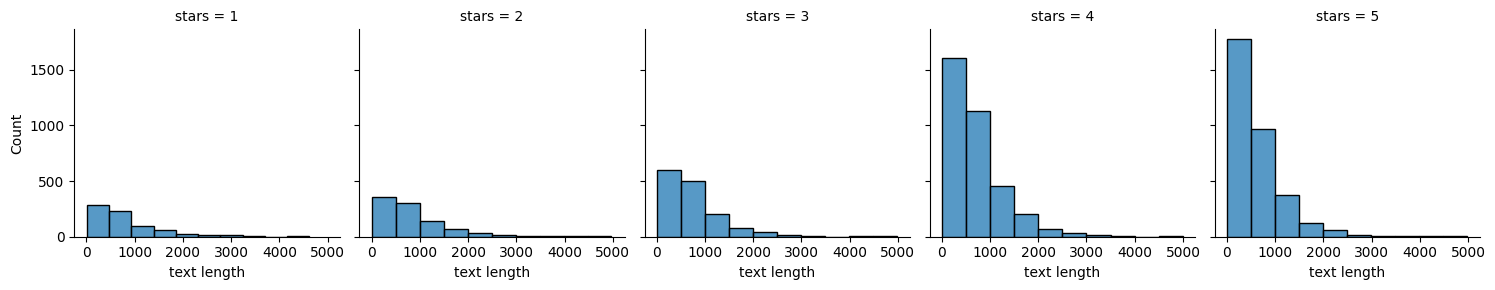

In [8]:
g = sns.FacetGrid(yelp, col='stars')
g.map_dataframe(sns.histplot, x="text length", bins=10)

**Boxplot of text length for each star category.**

<Axes: xlabel='stars', ylabel='text length'>

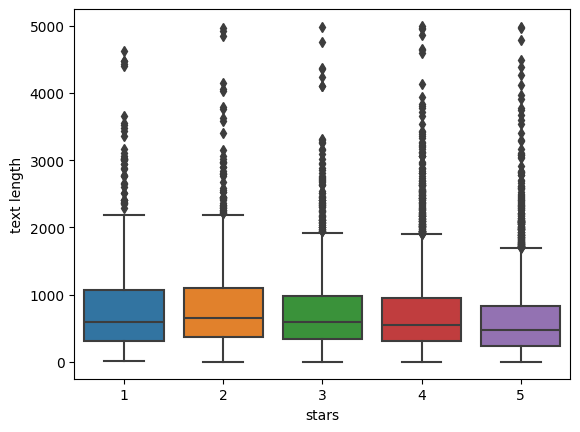

In [9]:
sns.boxplot(data=yelp, x='stars', y='text length')

**Countplot of the number of occurrences for each type of star rating. There are significantly more ratings with 4 and 5 stars**

<Axes: xlabel='stars', ylabel='count'>

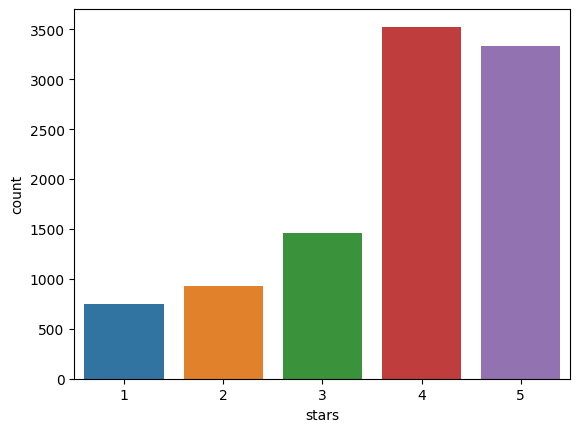

In [10]:
sns.countplot(data=yelp, x='stars')

## NLP Classification Task

Here we only grab reviews that were either 1 star or 5 stars.

In [11]:
yelp_class = yelp[(yelp['stars']==1) | (yelp['stars']==5)]

Our target feature is the text and label is the star

In [12]:
X = yelp_class['text']
y = yelp_class['stars']

**We use a CountVectorizer to turn the text into a matrix of token output (bag of words)**

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

In [14]:
X = CountVectorizer().fit_transform(X)

## Train Test Split

Let's split our data into training and testing data.

In [15]:
from sklearn.model_selection import train_test_split 

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Training a Model

We will use MultinomialNB as an algorithm

In [17]:
from sklearn.naive_bayes import MultinomialNB

In [18]:
nb = MultinomialNB()

**Now fit nb using the training data.**

In [19]:
nb.fit(X_train, y_train)

MultinomialNB()

## Predictions and Evaluations

Time to see how our model did!

In [20]:
pred = nb.predict(X_test)

In [21]:
from sklearn.metrics import confusion_matrix, classification_report

In [22]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[159  69]
 [ 22 976]]
              precision    recall  f1-score   support

           1       0.88      0.70      0.78       228
           5       0.93      0.98      0.96       998

    accuracy                           0.93      1226
   macro avg       0.91      0.84      0.87      1226
weighted avg       0.92      0.93      0.92      1226



**The performance of the model is quite high, though metrics are lower for predictions of star 1. 
Now we will see what happens if we try to include TF-IDF to this process using a pipeline.**

# Using Text Processing

In [23]:
from sklearn.feature_extraction.text import TfidfTransformer

In [24]:
from sklearn.pipeline import Pipeline

** Now we create a pipeline with the following steps: CountVectorizer(), TfidfTransformer(),MultinomialNB()**

In [25]:
pipeline = Pipeline([('bow', CountVectorizer()), ('tfidf', TfidfTransformer()), ('classifier', MultinomialNB())])

## Using the Pipeline

**Time to use the pipeline! Now we will need to re-split the original data because we overwrote X as the CountVectorized version. What we need is just the text**

### Train Test Split

**Redo the train test split on the yelp_class object.**

In [26]:
X = yelp_class['text']
y = yelp_class['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

**Now we fit the pipeline to the unvectorized training data.**

In [27]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

### Predictions and Evaluation

**Now we use the pipeline to predict from the X_test and create a classification report and confusion matrix.**

In [28]:
pred_new = pipeline.predict(X_test)

In [29]:
print(confusion_matrix(y_test, pred_new))
print(classification_report(y_test, pred_new))

[[  0 228]
 [  0 998]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       228
           5       0.81      1.00      0.90       998

    accuracy                           0.81      1226
   macro avg       0.41      0.50      0.45      1226
weighted avg       0.66      0.81      0.73      1226



/Users/aigerimsagadiyeva/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/aigerimsagadiyeva/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/aigerimsagadiyeva/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

**Looks like applying TF-IDF algorithm negatively affected the performance of the model. Now we can try to change some steps of the pipeline, for example, let's try to use Random Forest Classifier instead of MultinomialNB. 
We can also compare the results with and without TF_IDF method.** 

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
rdf = RandomForestClassifier()

In [42]:
pipeline_rdf = Pipeline([('bow', CountVectorizer()), ('tfidf', TfidfTransformer()), ('classifier', RandomForestClassifier())])

In [43]:
pipeline_rdf.fit(X_train, y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier())])

In [44]:
pred_rdf = pipeline_rdf.predict(X_test)

In [45]:
print(confusion_matrix(y_test, pred_rdf))
print(classification_report(y_test, pred_rdf))

[[ 45 183]
 [  1 997]]
              precision    recall  f1-score   support

           1       0.98      0.20      0.33       228
           5       0.84      1.00      0.92       998

    accuracy                           0.85      1226
   macro avg       0.91      0.60      0.62      1226
weighted avg       0.87      0.85      0.81      1226



**Seems like changing the classifier helped to increase the metrics for 1 star reviews. The overall performance also increased.
Now let's see what happens when we remove TF_IDF from our pipeline**

In [46]:
pipeline_rdf_notfidf = Pipeline([('bow', CountVectorizer()), ('classifier', RandomForestClassifier())])

In [47]:
pipeline_rdf_notfidf.fit(X_train, y_train)

Pipeline(steps=[('bow', CountVectorizer()),
                ('classifier', RandomForestClassifier())])

In [48]:
pred_rdf_notfidf = pipeline_rdf_notfidf.predict(X_test)

In [49]:
print(confusion_matrix(y_test, pred_rdf_notfidf))
print(classification_report(y_test, pred_rdf_notfidf))

[[ 60 168]
 [  2 996]]
              precision    recall  f1-score   support

           1       0.97      0.26      0.41       228
           5       0.86      1.00      0.92       998

    accuracy                           0.86      1226
   macro avg       0.91      0.63      0.67      1226
weighted avg       0.88      0.86      0.83      1226



**Removing TF-IDF improved overall recall and f1-score values. So for this task it is better not to use TF_IDF method. Also, Random Decision Forest is a better choice than the MultinomialNB for this dataset.
Hovewer, the results are still worse than MultinomialNB classifier applied on vectorized data.**